In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate,KFold,StratifiedKFold,LeaveOneOut,LeavePOut,RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
x_breast,y_breast=load_breast_cancer(return_X_y=True)
x=pd.DataFrame(x_breast)
y=pd.Series(y_breast).map({1:0,0:1})

In [3]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#Percetage
y.value_counts()/len(y)

0    0.627417
1    0.372583
dtype: float64

In [5]:
#Splitting the dataset into train and the test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)

(398, 30)
(171, 30)


# K-Fold Cross validation

In [6]:
#Logistics Regression
logit=LogisticRegression(penalty='l2',C=1,solver='liblinear',random_state=4,max_iter=10000)
#Hyperparameter space
param_grid=dict(penalty=['l1','l2'],
               C=[0.1,1,10])
#K-Fold crossvalidation
kf=KFold(n_splits=5,shuffle=True,random_state=4)
#Search
clf=GridSearchCV(logit,param_grid=param_grid,scoring='accuracy',cv=kf,refit=True)

search=clf.fit(x_train,y_train)
#Best hyperparameters
print(search.best_params_)

{'C': 10, 'penalty': 'l2'}


In [7]:
results=pd.DataFrame(search.cv_results_)[['params','mean_test_score','std_test_score']]
print(results.shape)
results

(6, 3)


,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.919620,0.012606
1,"{'C': 0.1, 'penalty': 'l2'}",0.934747,0.019812
2,"{'C': 1, 'penalty': 'l1'}",0.944810,0.024360
3,"{'C': 1, 'penalty': 'l2'}",0.944778,0.025651
4,"{'C': 10, 'penalty': 'l1'}",0.947247,0.014592
5,"{'C': 10, 'penalty': 'l2'}",0.949778,0.013609


Text(0.5, 0, 'Hyperparameter Space')

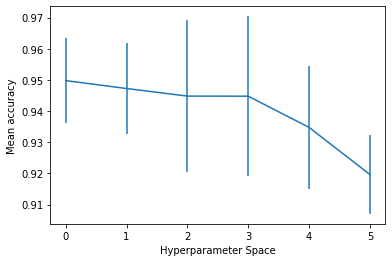

In [8]:
results.sort_values(by='mean_test_score',ascending=False,inplace=True)
results.reset_index(drop=True,inplace=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'],results['std_test_score']],subplots=True)
plt.ylabel('Mean accuracy')
plt.xlabel('Hyperparameter Space')

In [9]:
#Lets get the prediction
#train_pred=search.predict(x_train)
test_pred=search.predict(x_test)
#print("Train accuracy:",accuracy_score(x_train,train_pred))
print("Test accuracy:",accuracy_score(y_test,test_pred))

Test accuracy: 0.9532163742690059


# Repeated K Fold

In [10]:
#Logistics Regression
logit=LogisticRegression(penalty='l2',C=1,solver='liblinear',random_state=4,max_iter=10000)
#hyperparameter space
param_grid=dict(
penalty=['l1','l2'],
C=[0.1,1,10])
#Repeated Kfold cross validation
rkf=RepeatedKFold(n_splits=5,n_repeats=10,random_state=4)
#search
clf=GridSearchCV(logit,param_grid=param_grid,scoring='accuracy',cv=rkf,refit=True)
search=clf.fit(x_train,y_train)
#Best hyperparameters
print(search.best_params_)

{'C': 10, 'penalty': 'l1'}


In [11]:
results=pd.DataFrame(search.cv_results_)[['params','mean_test_score','std_test_score']]
print(results.shape)
results

(6, 3)


,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.922820,0.022496
1,"{'C': 0.1, 'penalty': 'l2'}",0.932896,0.021612
2,"{'C': 1, 'penalty': 'l1'}",0.948497,0.021488
3,"{'C': 1, 'penalty': 'l2'}",0.945465,0.023291
4,"{'C': 10, 'penalty': 'l1'}",0.955025,0.023470
5,"{'C': 10, 'penalty': 'l2'}",0.951509,0.024498


Text(0.5, 0, 'Hyperparameter Space')

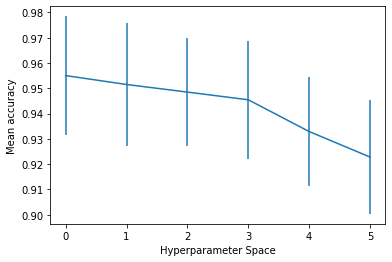

In [12]:
results.sort_values(by='mean_test_score',ascending=False,inplace=True)
results.reset_index(drop=True,inplace=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'],results['std_test_score']],subplots=True)
plt.ylabel('Mean accuracy')
plt.xlabel('Hyperparameter Space')

# Leave One Out 

In [13]:
#Logistics Regression
logit=LogisticRegression(penalty='l2',C=1,solver='liblinear',random_state=4,max_iter=10000)

#hyperparameter space
param_grid=dict(
penalty=['l1','l2'],
C=[0.1,1,10])
#Leave one ouyyt cross validation
loo=LeaveOneOut()
#Search
clf=GridSearchCV(logit,param_grid=param_grid,scoring='accuracy',cv=loo,refit=True)
search=clf.fit(x_train,y_train)
#best hyperparameters
print(search.best_params_)

{'C': 10, 'penalty': 'l1'}


# Leave p out crossvalidation

In [14]:
#Logistics Regression
logit=LogisticRegression(penalty='l2',C=1,solver='liblinear',random_state=4,max_iter=10000)
#Hyperparammeter space
param_grid=dict(
penalty=['l1','l2'],
C=[0.1,1,10])
#Leave p out cross validation
lp=LeavePOut(p=2)
#I take the smaller sample of the data otherwise my computers run out of the memory
x_train_small=x_train.head(100)
y_train_small=y_train.head(100)

#search
clf=GridSearchCV(logit,param_grid=param_grid,scoring='accuracy',cv=lp,refit=True)
search=clf.fit(x_train_small,y_train_small)
#best hyperparameter
print(search.best_params_)

{'C': 10, 'penalty': 'l2'}


# Stratified cross validation

In [15]:
#Logistics regression
logit=LogisticRegression(penalty='l2',C=1,solver='liblinear',random_state=4,max_iter=1000)

#hyperparameter space
param_grid=dict(
penalty=['l1','l2'],
C=[0.1,1,10])
scv=StratifiedKFold(n_splits=5,shuffle=True,random_state=4)
#search
clf=GridSearchCV(logit,param_grid=param_grid,scoring='accuracy',cv=scv,refit=True)
search=clf.fit(x_train,y_train)
#Best hyperparameter
print(search.best_params_)

{'C': 1, 'penalty': 'l1'}


In [16]:
results=pd.DataFrame(search.cv_results_)[['params','mean_test_score','std_test_score']]
print(results.shape)
results

(6, 3)


,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.927025,0.020516
1,"{'C': 0.1, 'penalty': 'l2'}",0.926994,0.027246
2,"{'C': 1, 'penalty': 'l1'}",0.949652,0.026659
3,"{'C': 1, 'penalty': 'l2'}",0.944620,0.023649
4,"{'C': 10, 'penalty': 'l1'}",0.947184,0.021802
5,"{'C': 10, 'penalty': 'l2'}",0.949652,0.021315


Text(0.5, 0, 'Hyperparameter space')

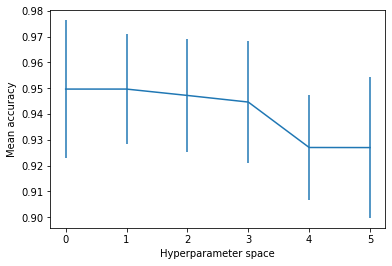

In [19]:
results.sort_values(by='mean_test_score',ascending=False,inplace=True)
results.reset_index(drop=True,inplace=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'],results['std_test_score']],subplots=True)
plt.ylabel('Mean accuracy')
plt.xlabel('Hyperparameter space')